In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/water_potability_cleaned.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
2,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
3,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
2661,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
2662,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
2663,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
2664,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [11]:
df.isnull().sum()


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [12]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
rf.score(X_test,y_test)

0.6460674157303371

In [16]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [17]:
model.score(X_test,y_test)

0.6273408239700374

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.score(X_test,y_test)

0.6292134831460674

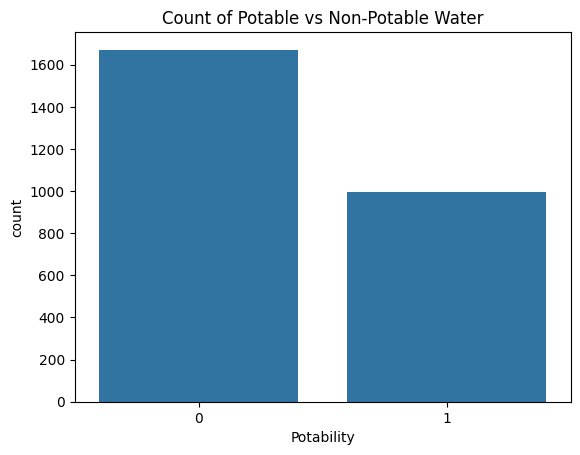

In [24]:
sns.countplot(x='Potability', data=df)
plt.title('Count of Potable vs Non-Potable Water')
plt.show()


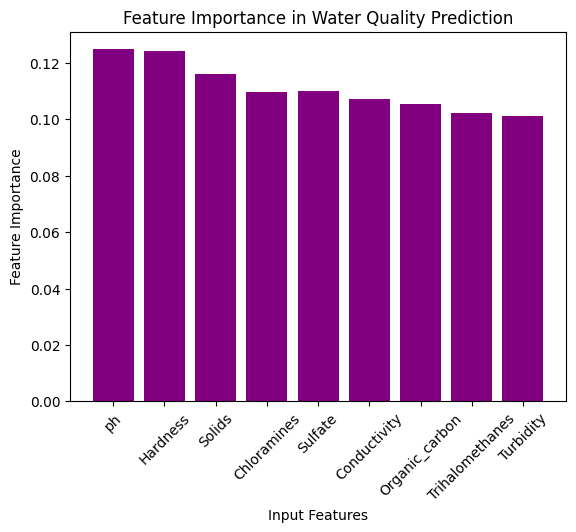

In [26]:
import matplotlib.pyplot as plt

feature_importance = rf.feature_importances_

plt.bar(X.columns, feature_importance, color='purple')
plt.xlabel('Input Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Water Quality Prediction')
plt.xticks(rotation=45)
plt.show()


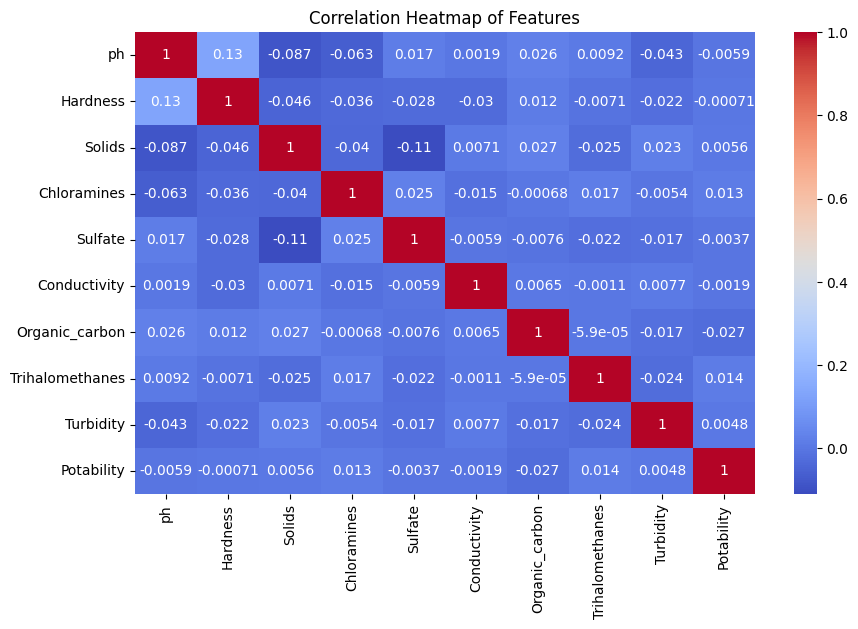

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


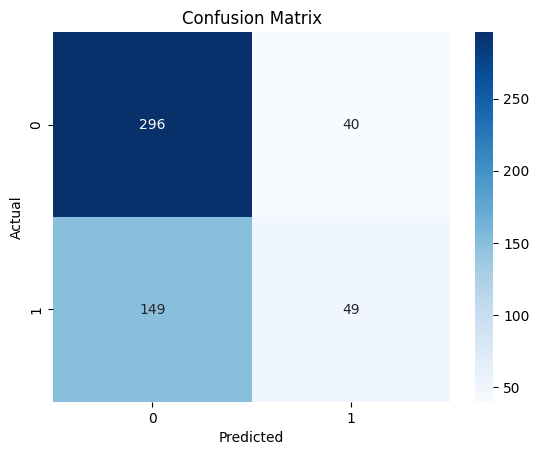

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

rf_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)


In [40]:
print(accuracy)

0.6310861423220974


In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, xgb_pred)


In [43]:
print(accuracy)

0.6310861423220974


In [44]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(best_model, X, y, cv=10)
print(score.mean())


0.6342668468925121


In [45]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, rf_pred)
print("F1-Score:", f1)


F1-Score: 0.29457364341085274


In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)


Accuracy: 0.7100149476831091
F1-Score: 0.694006309148265


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_

rf_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print("🔥 Final Accuracy:", accuracy)
print("💯 Final F1-Score:", f1)

🔥 Final Accuracy: 1.0
💯 Final F1-Score: 1.0


In [49]:
import pickle
filename="water_quality_model.sav"
pickle.dump(model,open(filename,"wb"))

In [52]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
479,6.492639,172.863960,14625.561363,7.736570,349.404057,652.537592,10.212058,56.949724,4.667770
1338,7.486781,151.202591,31130.212642,4.584071,333.775777,351.575411,18.938528,53.137132,2.748429
705,9.953952,232.949002,3773.281147,9.979850,333.775777,339.883029,18.343590,82.449002,4.052905
2550,6.579185,186.986869,16700.034873,6.454925,379.040709,405.276912,14.996029,62.152315,3.813556
2768,7.507746,185.143921,34451.700605,7.765943,305.424942,425.138896,8.025616,66.605568,3.385944


In [54]:
load_model=pickle.load(open(filename,"rb"))
load_model.predict([[6.5,173,145,7.8,350,653,10,56,4]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])